In [2]:
import pandas as pd
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap

### Reading in Data

In [95]:
SST2000s_file = Dataset('/Users/michaelvaden/Downloads/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.SST.200001-200912.nc', 'r')
PRECC2000s_file = Dataset('/Users/michaelvaden/Downloads/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.PRECC.200001-200912.nc', 'r')
PRECL2000s_file = Dataset('/Users/michaelvaden/Downloads/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.PRECL.200001-200912.nc', 'r')
Z32000s_file = Dataset('/Users/michaelvaden/Downloads/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.Z3.200001-200912.nc', 'r')

In [50]:
lats = SST2000s_file['lat'][:]
lons = SST2000s_file['lon'][:]
time = SST2000s_file['time'][:]
date = SST2000s_file['date'][:]
sst = SST2000s_file['SST'][:]

In [92]:
lats_p = PRECC2000s_file['lat'][:]
lons_p = PRECC2000s_file['lon'][:]
time_p = PRECC2000s_file['time'][:]
date_p = PRECC2000s_file['date'][:]
precc= PRECC2000s_file['PRECC'][:]

In [85]:
lats_pl = PRECL2000s_file['lat'][:]
lons_pl = PRECL2000s_file['lon'][:]
time_pl = PRECL2000s_file['time'][:]
date_pl = PRECL2000s_file['date'][:]
precl= PRECL2000s_file['PRECL'][:]

### Exploring the Data

In [37]:
print(min(lats), max(lats))
print(min(lons), max(lons))

-90.0 90.0
0.0 358.75


In [91]:
print(sum(date == date_p))
print(sum(time == time_p))
print(sum(lats == lats_p))
print(sum(lons == lons_p))
# All of these date/time files and lon/lat files are identical across different measures

120
120
192
288


In [36]:
print(min(lats_p), max(lats_p))
print(min(lons_p), max(lons_p))

-90.0 90.0
0.0 358.75


In [45]:
SST2000s_file['SST']

<class 'netCDF4._netCDF4.Variable'>
float32 SST(time, lat, lon)
    _FillValue: -900.0
    units: K
    long_name: sea surface temperature
    cell_methods: time: mean
unlimited dimensions: time
current shape = (120, 192, 288)
filling on

In [38]:
PRECC2000s_file['PRECC']

<class 'netCDF4._netCDF4.Variable'>
float32 PRECC(time, lat, lon)
    _FillValue: -900.0
    units: m/s
    long_name: Convective precipitation rate (liq + ice)
    cell_methods: time: mean
unlimited dimensions: time
current shape = (120, 192, 288)
filling on

In [84]:
PRECL2000s_file['PRECL']

<class 'netCDF4._netCDF4.Variable'>
float32 PRECL(time, lat, lon)
    _FillValue: -900.0
    units: m/s
    long_name: Large-scale (stable) precipitation rate (liq + ice)
    cell_methods: time: mean
unlimited dimensions: time
current shape = (120, 192, 288)
filling on

In [97]:
Z32000s_file['Z3'] # 4 dimensions??

<class 'netCDF4._netCDF4.Variable'>
float32 Z3(time, lev, lat, lon)
    _FillValue: -900.0
    mdims: 1
    units: m
    long_name: Geopotential Height (above sea level)
    cell_methods: time: mean
unlimited dimensions: time
current shape = (120, 32, 192, 288)
filling on

In [47]:
SST2000s_file['date'][:]

masked_array(data=[20000201, 20000301, 20000401, 20000501, 20000601,
                   20000701, 20000801, 20000901, 20001001, 20001101,
                   20001201, 20010101, 20010201, 20010301, 20010401,
                   20010501, 20010601, 20010701, 20010801, 20010901,
                   20011001, 20011101, 20011201, 20020101, 20020201,
                   20020301, 20020401, 20020501, 20020601, 20020701,
                   20020801, 20020901, 20021001, 20021101, 20021201,
                   20030101, 20030201, 20030301, 20030401, 20030501,
                   20030601, 20030701, 20030801, 20030901, 20031001,
                   20031101, 20031201, 20040101, 20040201, 20040301,
                   20040401, 20040501, 20040601, 20040701, 20040801,
                   20040901, 20041001, 20041101, 20041201, 20050101,
                   20050201, 20050301, 20050401, 20050501, 20050601,
                   20050701, 20050801, 20050901, 20051001, 20051101,
                   20051201, 20060

**southern California (32.0–34.9°N; 239.4–245.6°E)**

**central California (34.9–38.6°N ;236.9–243.1°E)**

**northern California (38.8–42.4°N; 235.6–240.6°E)**

In [7]:
# map = Basemap(projection = 'merc', # Coordinates for California
#              llcrnrlat=30,
#              llcrnrlon=230,
#              urcrnrlat=45,
#              urcrnrlon=246,
#              resolution='i')
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full

In [78]:
lon, lat = np.meshgrid(lons, lats)
x, y = map(lon, lat)

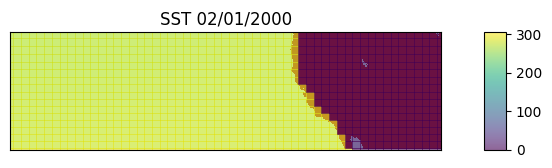

In [79]:
#map = Basemap(projection='merc',llcrnrlon=-130.,llcrnrlat=30.,urcrnrlon=-114.,urcrnrlat=45.,resolution='i')
map = Basemap(projection='merc',llcrnrlon=190.,llcrnrlat=30.,urcrnrlon=260.,urcrnrlat=45.,resolution='i')
map.drawcoastlines
#map.drawstates
map.drawcountries
map.drawlsmask(land_color='brown', ocean_color='#CCFFFF') # can use HTML names or codes for colors
map.drawcounties() # you can even add counties (and other shapefiles!)

color_scheme = map.pcolor(x, y, np.squeeze(sst[0,:,:]), alpha = 0.6)
#color_scheme = map.contourf(x, y, sst[100,:,:])
color_bar = map.colorbar(color_scheme, location = 'right', pad = '10%')

plt.title('SST 02/01/2000')
plt.show()
#plt.figure(figsize=(10, 8))


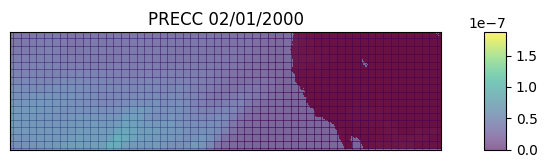

In [80]:
lon_p, lat_p = np.meshgrid(lons_p, lats_p)
x_p, y_p = map(lon_p, lat_p)

map = Basemap(projection='merc',llcrnrlon=190.,llcrnrlat=30.,urcrnrlon=260.,urcrnrlat=45.,resolution='i')
map.drawcoastlines
#map.drawstates
map.drawcountries
map.drawlsmask(land_color='brown', ocean_color='#CCFFFF') # can use HTML names or codes for colors
map.drawcounties() # you can even add counties (and other shapefiles!)

color_scheme_p = map.pcolor(x_p, y_p, np.squeeze(precc[0,:,:]), alpha = 0.6)
#color_scheme = map.contourf(x, y, sst[100,:,:])
color_bar_p = map.colorbar(color_scheme_p, location = 'right', pad = '10%')

plt.title('PRECC 02/01/2000')
plt.show()

### PRECC: Convective Precipitation Rate

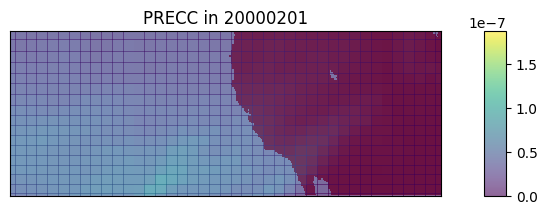

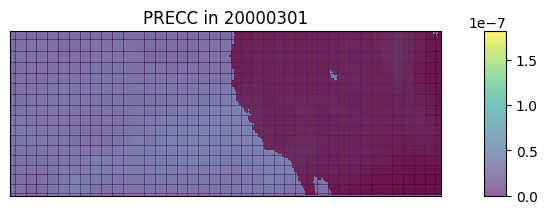

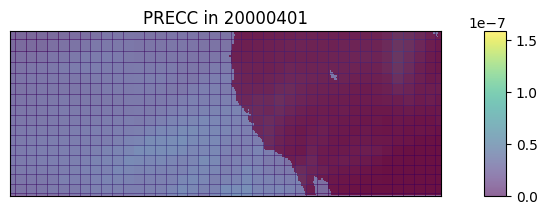

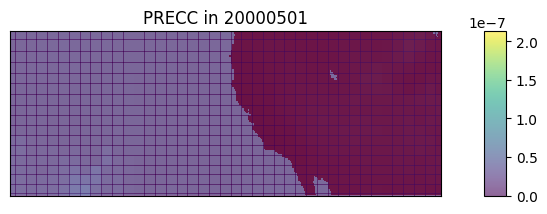

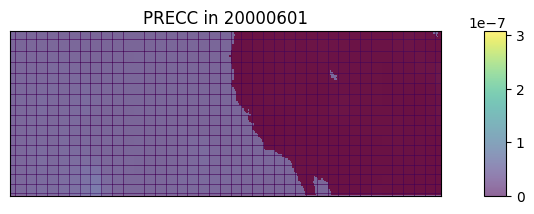

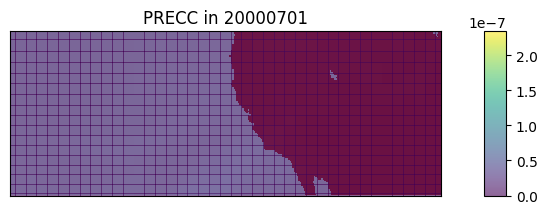

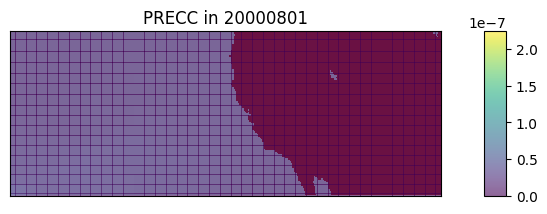

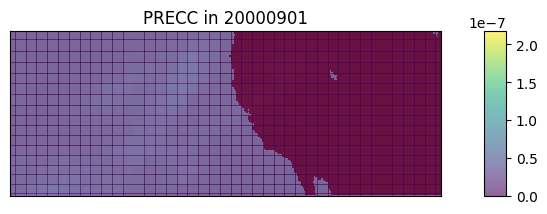

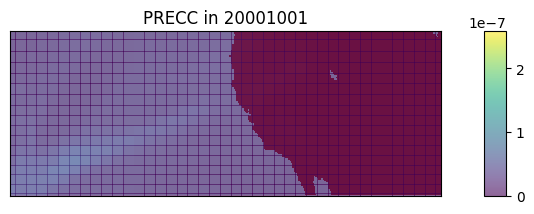

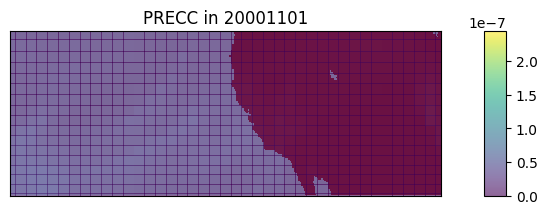

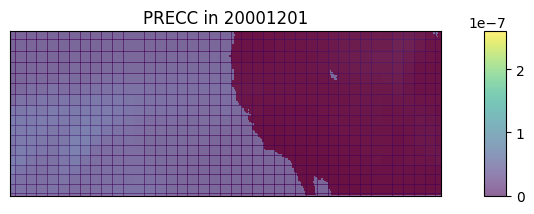

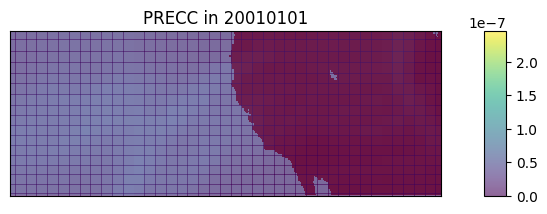

In [81]:
lon, lat = np.meshgrid(lons, lats)
x, y = map(lon, lat)

map = Basemap(projection='merc',llcrnrlon=210.,llcrnrlat=30.,urcrnrlon=260.,urcrnrlat=45.,resolution='i')

for i in range(12):
    map.drawcoastlines
    #map.drawstates
    map.drawcountries
    map.drawlsmask(land_color='brown', ocean_color='#CCFFFF') # can use HTML names or codes for colors

    color_scheme = map.pcolor(x, y, np.squeeze(precc[i,:,:]), alpha = 0.6)
    #color_scheme = map.contourf(x, y, sst[100,:,:])
    color_bar = map.colorbar(color_scheme, location = 'right', pad = '10%')

    plt.title(f'PRECC in {date[i]}')
    plt.show()

### SST: Sea Surface Temperature

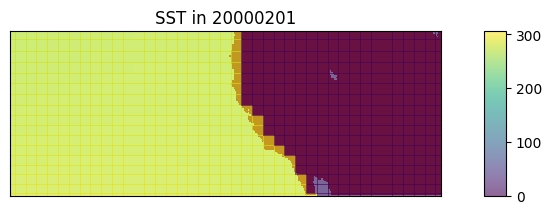

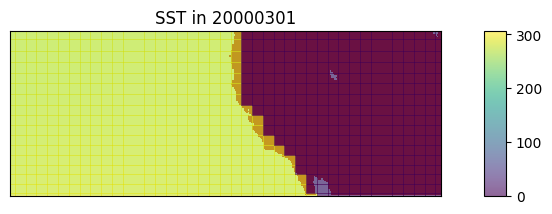

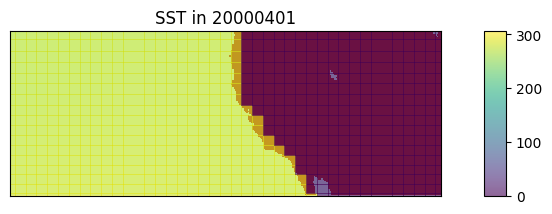

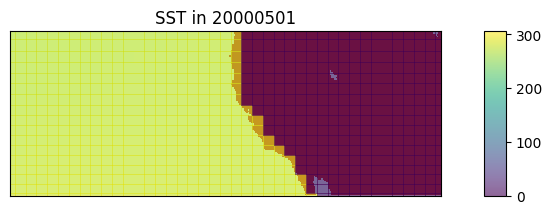

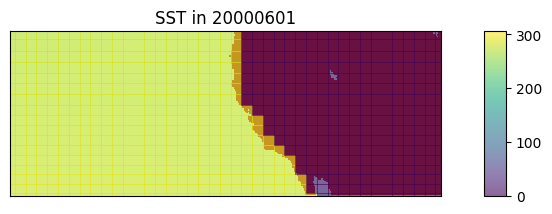

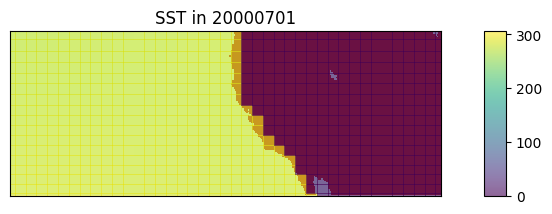

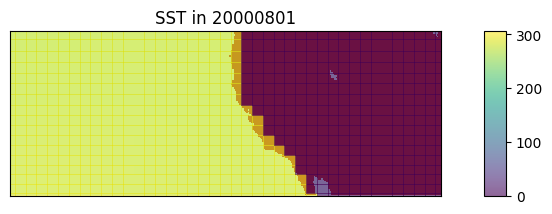

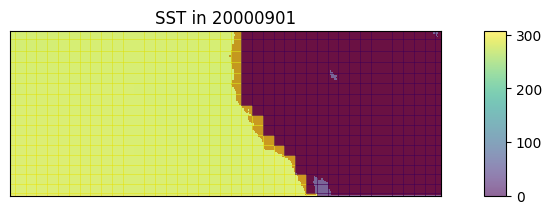

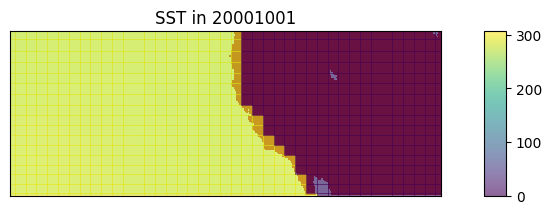

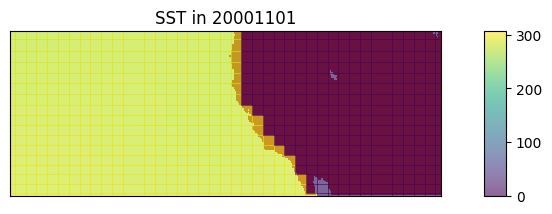

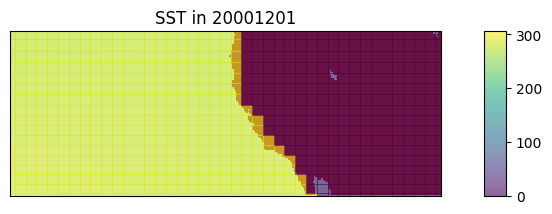

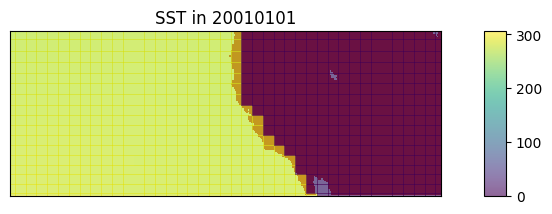

In [82]:
lon, lat = np.meshgrid(lons, lats)
x, y = map(lon, lat)

map = Basemap(projection='merc',llcrnrlon=210.,llcrnrlat=30.,urcrnrlon=260.,urcrnrlat=45.,resolution='i')

for i in range(12):
    map.drawcoastlines
    #map.drawstates
    map.drawcountries
    map.drawlsmask(land_color='brown', ocean_color='#CCFFFF') # can use HTML names or codes for colors

    color_scheme = map.pcolor(x, y, np.squeeze(sst[i,:,:]), alpha = 0.6)
    #color_scheme = map.contourf(x, y, sst[100,:,:])
    color_bar = map.colorbar(color_scheme, location = 'right', pad = '10%')

    plt.title(f'SST in {date[i]}')
    plt.show()

### PRECL: Large-scale Precipitation Rate

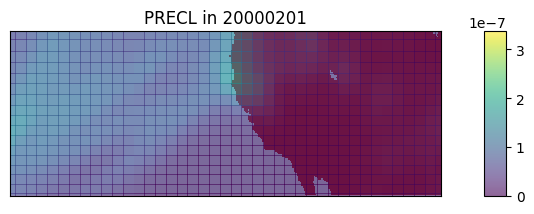

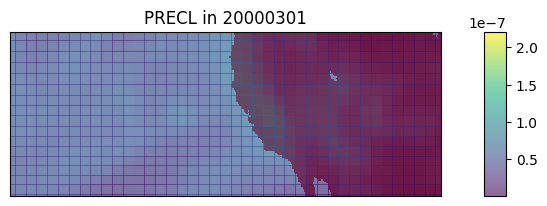

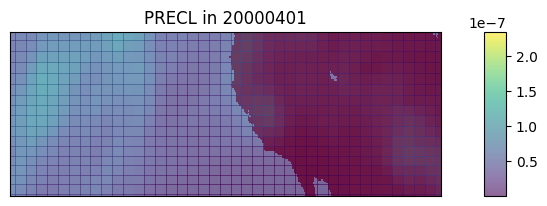

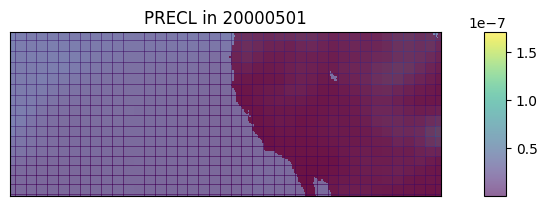

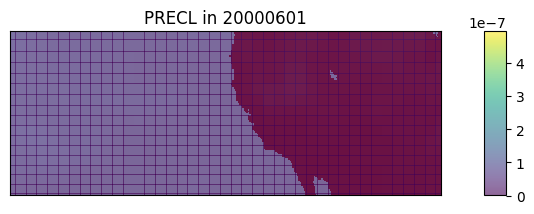

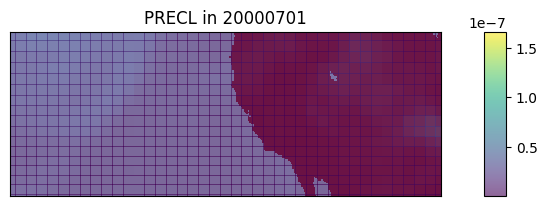

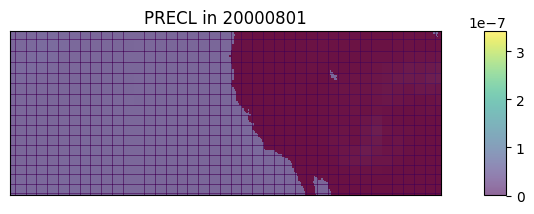

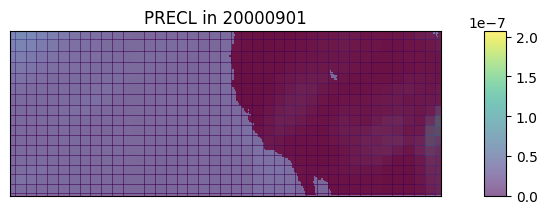

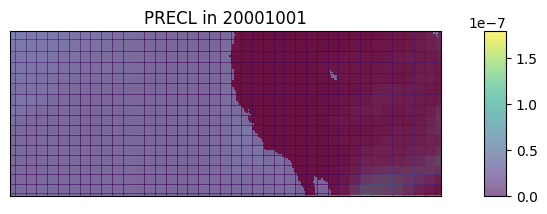

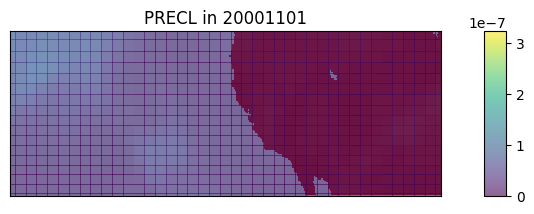

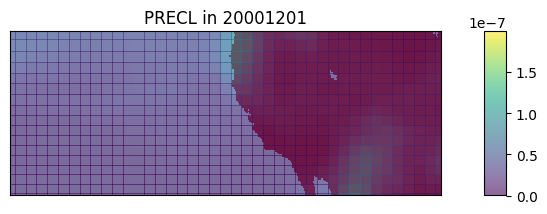

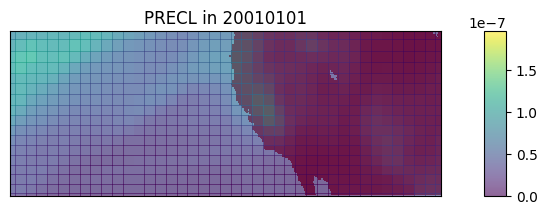

In [94]:
lon, lat = np.meshgrid(lons, lats)
x, y = map(lon, lat)

map = Basemap(projection='merc',llcrnrlon=210.,llcrnrlat=30.,urcrnrlon=260.,urcrnrlat=45.,resolution='i')

for i in range(12):
    map.drawcoastlines
    #map.drawstates
    map.drawcountries
    map.drawlsmask(land_color='brown', ocean_color='#CCFFFF') # can use HTML names or codes for colors

    color_scheme = map.pcolor(x, y, np.squeeze(precl[i,:,:]), alpha = 0.6)
    #color_scheme = map.contourf(x, y, sst[100,:,:])
    color_bar = map.colorbar(color_scheme, location = 'right', pad = '10%')

    plt.title(f'PRECL in {date[i]}')
    plt.show()

### Z3: Geopotential Height (above sea level)

In [109]:
Z32000s_file['lev']

<class 'netCDF4._netCDF4.Variable'>
float64 lev(lev)
    _FillValue: -900.0
    long_name: hybrid level at midpoints (1000*(A+B))
    units: hPa
    positive: down
    standard_name: atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms: a: hyam b: hybm p0: P0 ps: PS
unlimited dimensions: 
current shape = (32,)
filling on

This is 4d data so I'm not gonna touch this for now